In [0]:
import networkx as nx
import matplotlib.pyplot as plt

from graphframes import GraphFrame

In [0]:
def plot_graph(gf):
  
  gplot = nx.DiGraph()
  edge_labels = {}
  
  plt.figure(figsize=(6, 7))
  for node in gf.vertices.select('id').take(1000):
    gplot.add_node(node['id'])
 
  for row in gf.edges.select('src', 'dst', 'distance').take(1000):
    gplot.add_edge(row['src'], row['dst'])
    edge_labels[(row['src'], row['dst'])] = row['distance']
       
  pos = nx.shell_layout(gplot)
  
  nx.draw(gplot,
          pos,
          with_labels=True, 
          font_weight='bold', 
          node_size=1800, 
          font_size=15, 
          width=2)
    
  nx.draw_networkx_edge_labels(gplot,
                               pos,
                               edge_labels=edge_labels,
                               font_color='green',
                               font_size=10,
                               font_weight='bold')

In [0]:
vertices = spark.createDataFrame([("BLR", "Bangalore", 20),
                                  ("MUM", "Mumbai", 25),
                                  ("AHM", "Ahmedabad", 4),
                                  ("CHN", "Chennai", 21),
                                  ("DEL", "Delhi", 23),
                                  ("HYD", "Hyderabad", 18),
                                  ("MYS", "Mysore", 2)], ["id", "city", "population"])

In [0]:
edges = spark.createDataFrame([("BLR", "MUM", 2000),
                               ("AHM", "BLR", 3000),
                               ("AHM", "MUM", 800),
                               ("CHN", "MYS", 600),
                               ("HYD", "MUM", 2300),
                               ("MUM", "CHN", 2800),
                               ("DEL", "HYD", 2600),
                               ("BLR", "DEL", 3200),
                               ("HYD", "BLR", 1000),
                               ("BLR", "HYD", 1000),
                               ("BLR", "MYS", 300),
                               ("DEL", "CHN", 1900),
                               ("MUM", "BLR", 2000),
                               ("AHM", "DEL", 1700)], ["src", "dst", "distance"])

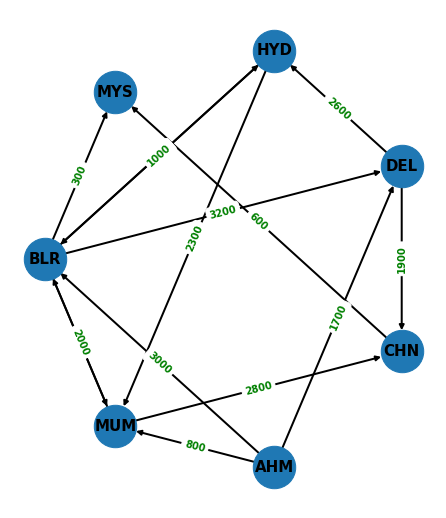

In [0]:
cities = GraphFrame(vertices, edges)

plot_graph(cities)

In [0]:
# find shortest path from all cities leading to 'MUM'. The graph above is unweighted graph. Shortest path takes direction(s) into account
paths = cities.shortestPaths(landmarks=['MUM'])

paths.display()

id,city,population,distances
AHM,Ahmedabad,4,Map(MUM -> 1)
BLR,Bangalore,20,Map(MUM -> 1)
MUM,Mumbai,25,Map(MUM -> 0)
DEL,Delhi,23,Map(MUM -> 2)
MYS,Mysore,2,Map()
HYD,Hyderabad,18,Map(MUM -> 1)
CHN,Chennai,21,Map()


In [0]:
# it is possible to specify multiple landmark vertices for the shortest path (find shortest path to both "DEL" and "MYS", if exists??)
paths = cities.shortestPaths(landmarks=['DEL', 'MYS'])

paths.display()

id,city,population,distances
AHM,Ahmedabad,4,"Map(MYS -> 2, DEL -> 1)"
BLR,Bangalore,20,"Map(MYS -> 1, DEL -> 1)"
MUM,Mumbai,25,"Map(MYS -> 2, DEL -> 2)"
DEL,Delhi,23,"Map(MYS -> 2, DEL -> 0)"
MYS,Mysore,2,Map(MYS -> 0)
HYD,Hyderabad,18,"Map(MYS -> 2, DEL -> 2)"
CHN,Chennai,21,Map(MYS -> 1)
